In [2]:
#esame python dapt0325it  Massa matteo 5/12/2025


import pandas as pd     #serve ad importare le librerie necessarie
import numpy as np       #serve ad usare le funzioni numeriche 
import seaborn as sns   #serve per creare grafici



In [3]:
#Punto 1*

#carichiamo il dataaset dal link github
url = "https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv"    
df = pd.read_csv(url)

In [4]:
df.head()  #mostra le prime 5 righe del dataset
df.info()  #mostra informazioni sul dataset
df.describe()  #mostra statistiche descrittive delle colonne numeriche
# Controlliamo la presenza di valori mancanti
missing_values = df.isnull().sum()
print("Dimensioni del dataset:", df.shape)
print("\nInformazioni e Metadati:")
print("\nElenco colonne disponibili:")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547060 entries, 0 to 547059
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     547060 non-null  object 
 1   date                                        547060 non-null  object 
 2   total_cases                                 533856 non-null  float64
 3   new_cases                                   530308 non-null  float64
 4   new_cases_smoothed                          529099 non-null  float64
 5   total_cases_per_million                     533856 non-null  float64
 6   new_cases_per_million                       530308 non-null  float64
 7   new_cases_smoothed_per_million              529099 non-null  float64
 8   total_deaths                                533856 non-null  float64
 9   new_deaths                                  531235 non-null  float64
 

In [5]:
df.sample(50)  #mostra 50 righe casuali del dataset

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
429578,Senegal,2025-08-07,89407.0,0.0,0.000000,5065.237000,0.000000,0.000000,1972.0,0.0,...,1.765110e+07,91.679733,18.888000,67.788399,3564.628174,17.887472,3.100000,22.246006,NaN,NaN
113522,Cuba,2021-11-11,957332.0,413.0,511.714300,86559.440000,37.342373,46.267860,8274.0,4.0,...,1.105982e+07,106.549347,41.505001,77.629097,NaN,NaN,7.600000,93.379219,5.33000,NaN
509465,United States,2021-03-09,28852298.0,43758.0,57334.145000,84478.540000,128.121930,167.872400,532471.0,895.0,...,3.415340e+08,37.336651,37.720001,77.978897,64623.125000,1.249734,10.700000,NaN,2.87000,NaN
39547,Bahrain,2022-06-11,593654.0,935.0,885.428600,387133.660000,609.732240,577.405700,1489.0,0.0,...,1.533460e+06,1941.088623,31.683001,80.992104,51854.714844,NaN,11.300000,100.000000,1.74000,NaN
532676,World,2021-09-28,232242466.0,344731.0,467398.000000,29181.822000,43.316277,58.729680,4809581.0,6251.0,...,8.021407e+09,61.633858,30.093000,72.639801,17527.189453,10.119776,9.799216,75.153732,2.88112,NaN
283041,Madagascar,2020-06-22,1596.0,93.0,46.285713,52.435730,3.055465,1.520693,14.0,1.0,...,3.043726e+07,52.315678,18.718000,63.067699,1502.482178,69.172638,4.600000,23.435631,NaN,NaN
134017,East Timor,2025-01-07,23460.0,0.0,0.000000,17132.854000,0.000000,0.000000,138.0,0.0,...,1.369299e+06,92.084663,20.639999,67.368401,3943.092529,43.935608,8.600000,28.407530,NaN,NaN
254840,Kuwait,2023-02-09,663146.0,0.0,0.000000,144491.550000,0.000000,0.000000,2570.0,0.0,...,4.589514e+06,257.548492,33.463001,78.788101,49400.355469,NaN,24.900000,NaN,2.04000,NaN
444890,Solomon Islands,2020-06-15,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,7.810750e+05,27.905502,20.030001,70.408600,2247.784912,40.301487,19.799999,38.636395,1.40000,NaN
74369,Bulgaria,2023-09-06,1300286.0,0.0,50.857143,190494.030000,0.000000,7.450655,38406.0,0.0,...,6.825862e+06,62.876400,44.153999,74.034203,26961.291016,1.011002,7.400000,NaN,7.45000,NaN


In [6]:
#2A 
df_country = df.dropna(subset=['continent']) #rimuoviamo le righe senza continente
casi_per_continente = df_country.groupby('continent')['new_cases'].sum() #raggruppiamo per continente e sommiamo i nuovi casi
# Calcoliamo il totale mondiale (somma di tutti i continenti)
totale_mondo = casi_per_continente.sum()     
print("Casi totali per continente:")
print(casi_per_continente)


Casi totali per continente:
continent
Africa            13065161.0
Asia             302240021.0
Europe           254760932.0
North America    124517132.0
Oceania           15033101.0
South America     69262711.0
Name: new_cases, dtype: float64


In [7]:
#2b
df_clean = df.dropna(subset=['continent'])  # Rimuovo le righe senza continente
casi_per_continente = df_clean.groupby('continent')['new_cases'].sum()  # 2. Raggruppo per continente e sommo i nuovi casi
totale_mondo = casi_per_continente.sum()    # 3. Calcolo il totale mondiale dei casi
percentuale_per_continente = (casi_per_continente / totale_mondo) * 100 # 4. Calcolo la percentuale di casi per continente
print(percentuale_per_continente)  # Stampo la percentuale di casi per continente))


continent
Africa            1.677431
Asia             38.804487
Europe           32.708664
North America    15.986709
Oceania           1.930094
South America     8.892614
Name: new_cases, dtype: float64


In [8]:
#3A
df_italia = df[df['country'] == 'Italy'].copy()  # Filtriamo i dati per l'Italia
df_italia['date'] = pd.to_datetime(df_italia['date'])  # Convertiamo la colonna 'date' in formato datetime
df_italia_2022 = df_italia[df_italia['date'].dt.year == 2022]  # Filtriamo i dati per l'anno 2022
df_italia_2022 = df_italia_2022.dropna(subset=['new_cases'])  # Rimuoviamo le righe con valori mancanti in 'new_cases'


Text(0.5, 1.0, 'Andamento dei nuovi casi giornalieri/settimanali in Italia nel 2022')

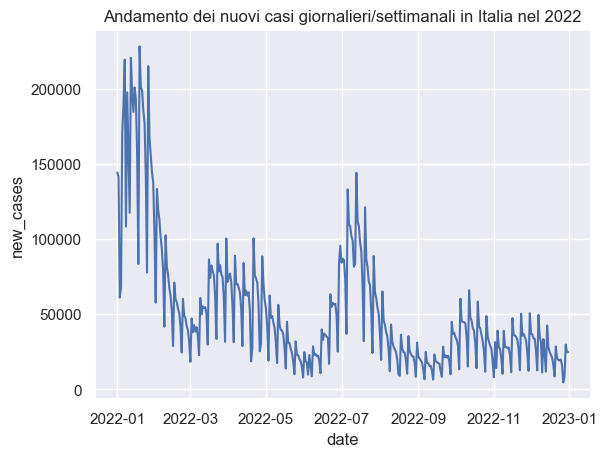

In [9]:
sns.set_theme()
plt = sns.lineplot(data=df_italia_2022, x='date', y='new_cases')  # Creiamo il grafico a linee
plt.set_title('Andamento dei nuovi casi giornalieri/settimanali in Italia nel 2022')  # Impostiamo il titolo del grafico

Text(0.5, 1.0, 'Andamento dei casi totali in Italia nel 2022')

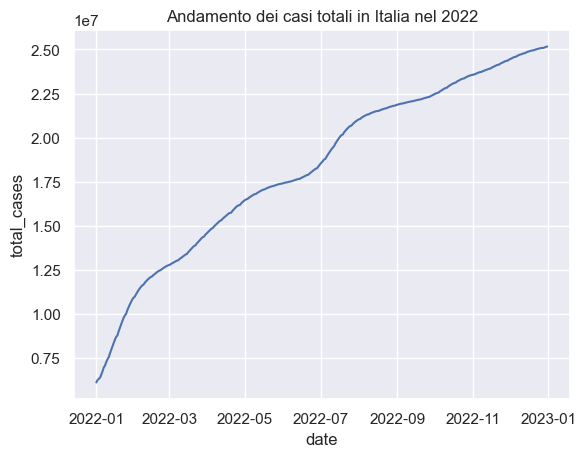

In [10]:
#3B

plt = sns.lineplot(data=df_italia_2022, x='date', y='total_cases')  # Creiamo il grafico a linee
plt.set_title('Andamento dei casi totali in Italia nel 2022')  # Impostiamo il titolo del grafico

Text(0.5, 1.0, 'Distribuzione dei pazienti in terapia intensiva (maggio 2022 - aprile 2023)')

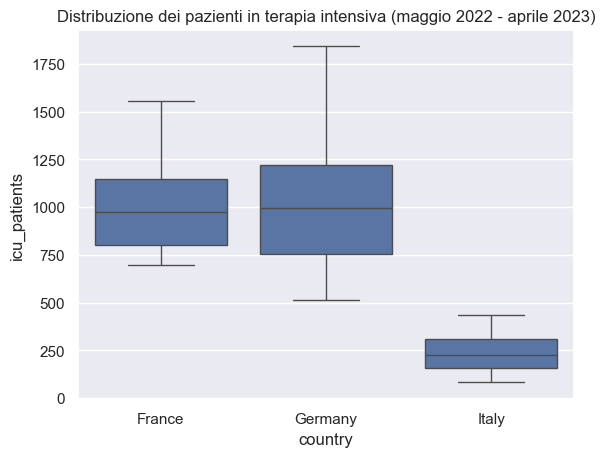

In [11]:
#punto 4


nazioni = ['Italy', 'Germany', 'France'] # Elenco delle nazioni da confrontare ( lista di nazioni )
df_nazioni = df[df['country'].isin(nazioni)].copy()  # Filtriamo i dati per le nazioni specificate
df_nazioni['date'] = pd.to_datetime(df_nazioni['date'])  # Convertiamo la colonna 'date' in formato datetime
df_nazioni = df_nazioni[df_nazioni['date'].between('2022-05-01', '2023-04-30')] # Filtro date 
plt = sns.boxplot(data=df_nazioni, x='country', y='icu_patients')  # Creiamo il boxplot
plt.set_title('Distribuzione dei pazienti in terapia intensiva (maggio 2022 - aprile 2023)')  # Impostiamo il titolo del grafico


In [12]:
# qua possiamo vedere attraverso il grafico che da maggio 2022 ad aprile 2023 la nazione con il maggior numero di pazienti in terapia intensiva è stata la Germania, 
# seguita dalla Francia e infine dall'Italia.


In [13]:
#punto 5a
nazioni = ['Italy', 'Germany', 'France', 'Spain']
df['date'] = pd.to_datetime(df['date']) 
df_2021 = df[(df['country'].isin(nazioni)) & (df['date'].dt.year == 2021)].copy()  # filtro 2021
dati_mancanti = df_2021['hosp_patients'].isnull().sum()
# 3. Calcolo la somma (Nota: i NaN vengono ignorati da sum(), quindi il totale è sottostimato)
somma = df_2021.groupby('country')['hosp_patients'].sum()
print("Valori mancanti trovati:", dati_mancanti)

Valori mancanti trovati: 365


In [14]:
# in quanto 365 valori mancanti trovati sono un valore molto alto,
#non posso sostituirli con le funzioni fillna() o interpolate() perchè non produrrebbe nessun cambiamento significativo nei dati.

country
France     6008717.0
Germany          0.0
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


<Axes: xlabel='country'>

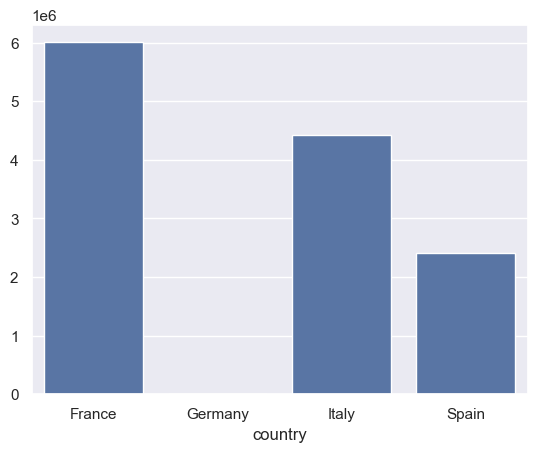

In [15]:
somma = df_2021.groupby('country')['hosp_patients'].sum()
print(somma) # Stampo la somma dei pazienti ospedalizzati per ciascuna nazione
sns.barplot(x=somma.index, y=somma.values)